<a href="https://colab.research.google.com/github/KhalidEl-MariAa/california_houses_prices_prediction/blob/main/california_house_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data= pd.read_csv('/content/housing.csv') #read data

In [3]:
data.head() #explore data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.shape

(20640, 10)

In [5]:
data.info() #explore data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.isna().sum() #Nan values sum

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
data.dropna(inplace=True) #Remove Nan values rows

In [8]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
data.ocean_proximity.unique() #values of ocean_proximity column

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
import sklearn.preprocessing as sp
encoder = sp.LabelEncoder()


In [11]:
ocean_prox_encoded = encoder.fit_transform(data.ocean_proximity)

In [12]:
data.ocean_proximity = ocean_prox_encoded #change ocean_proximity values to numerical values
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [13]:
encoder_classes_List = encoder.classes_.tolist()
encoder_values_list = data.ocean_proximity.unique().tolist()
len(encoder_values_list)


5

In [14]:
encoder_map={}
for x in range(5):
  encoder_map[encoder_classes_List[x]]= encoder_values_list[x]

encoder_map

{'<1H OCEAN': 3, 'INLAND': 0, 'ISLAND': 1, 'NEAR BAY': 4, 'NEAR OCEAN': 2}

In [15]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,1.166153
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,1.420135
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,1.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

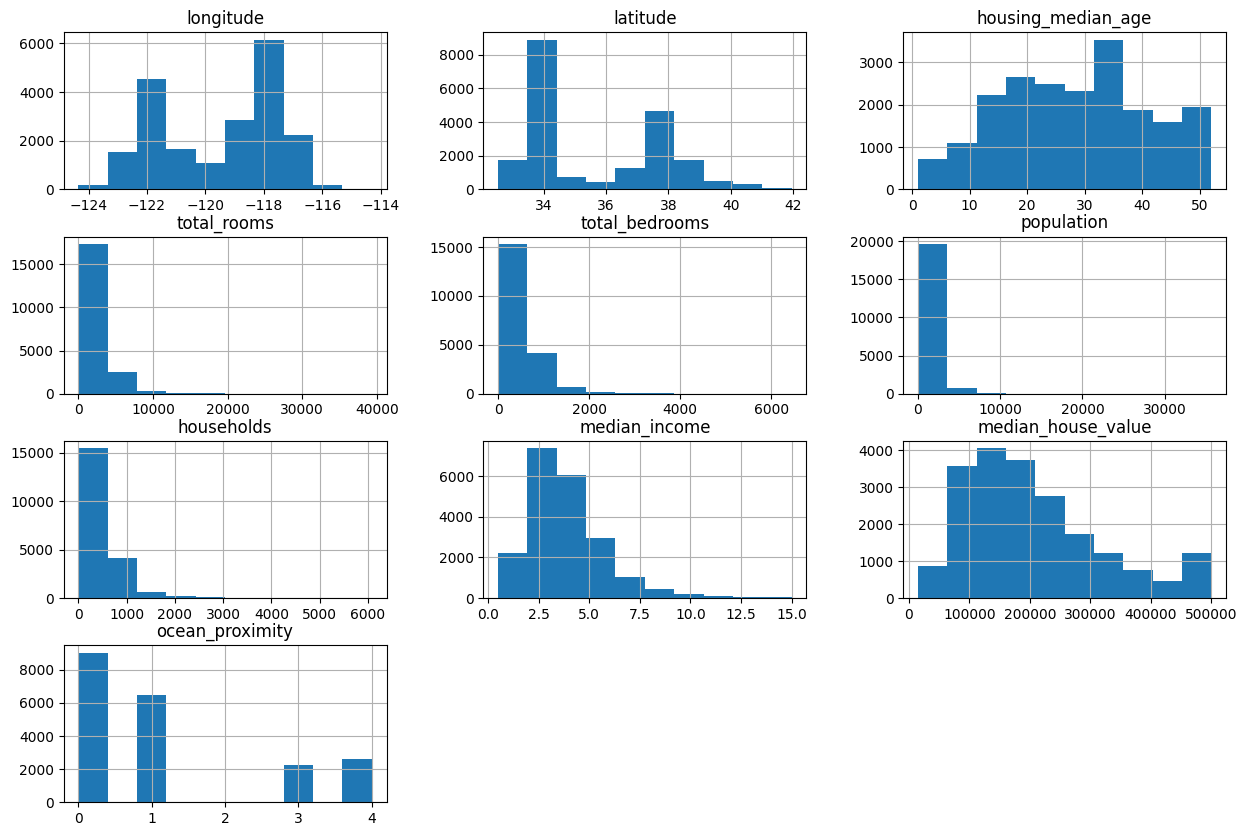

In [16]:
data.hist(figsize=(15,10))

<Axes: ylabel='median_house_value'>

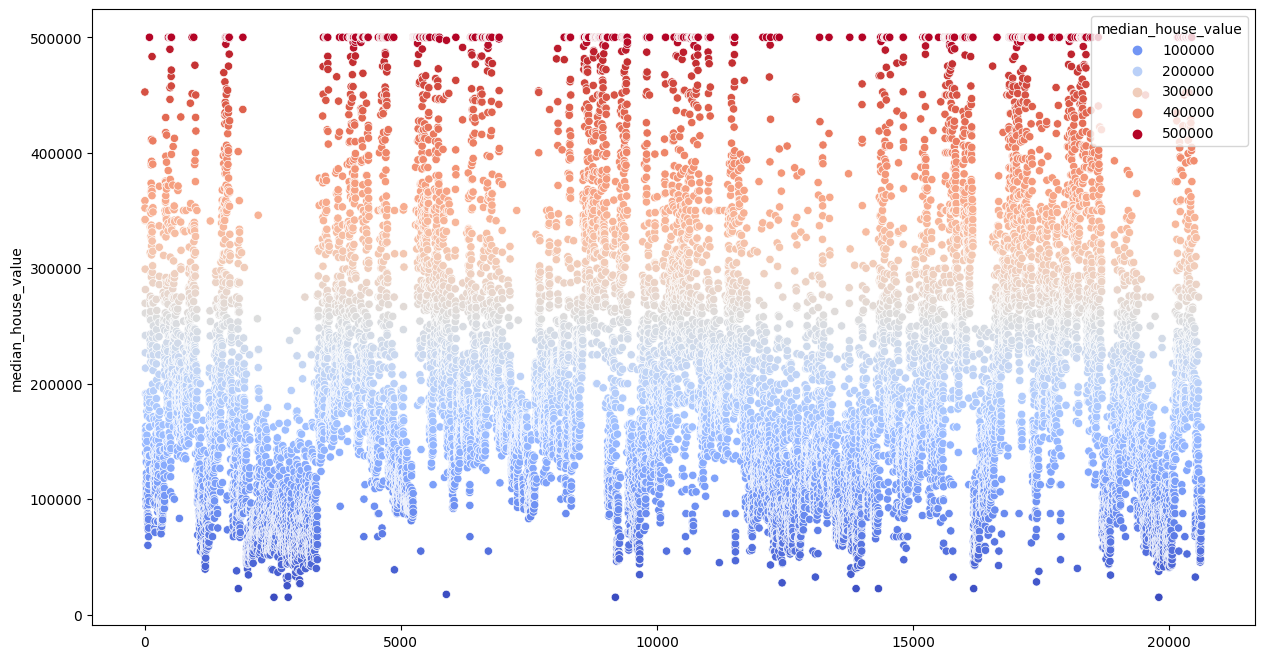

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(x= data.index, y = 'median_house_value' ,data= data, hue=data.median_house_value,palette='coolwarm')

<Axes: xlabel='latitude', ylabel='longitude'>

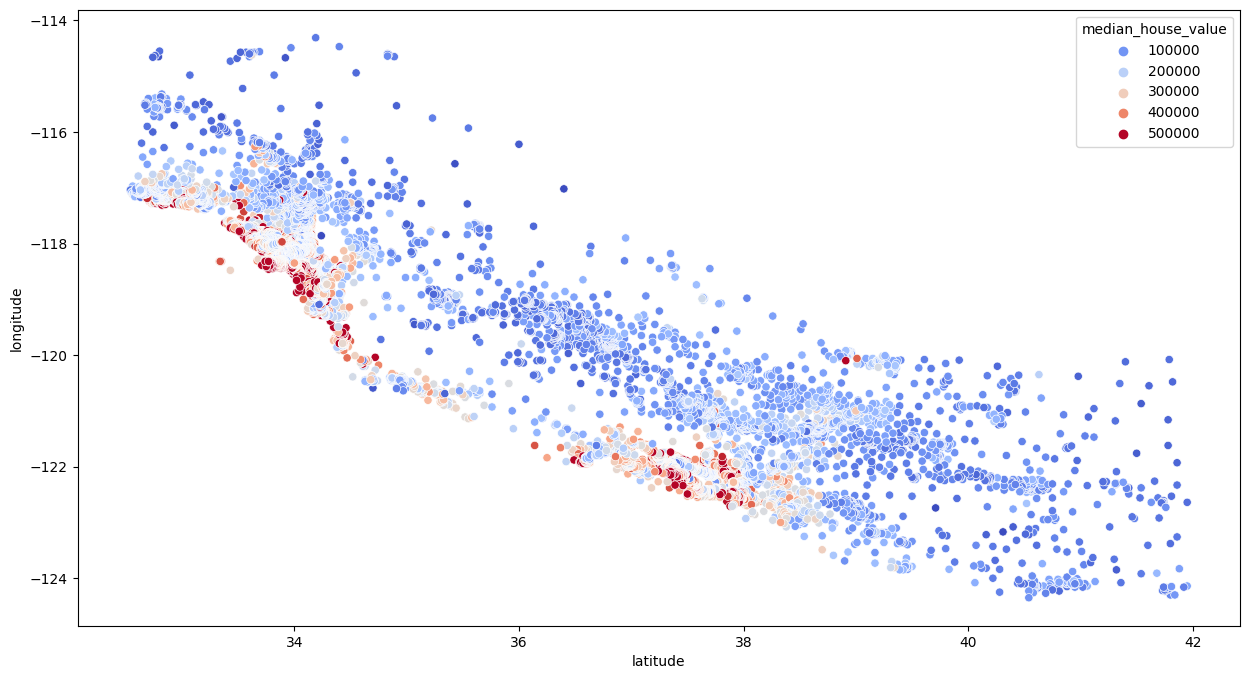

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(x= 'latitude', y = 'longitude' ,data= data, hue=data.median_house_value,palette='coolwarm')

<Axes: xlabel='housing_median_age', ylabel='population'>

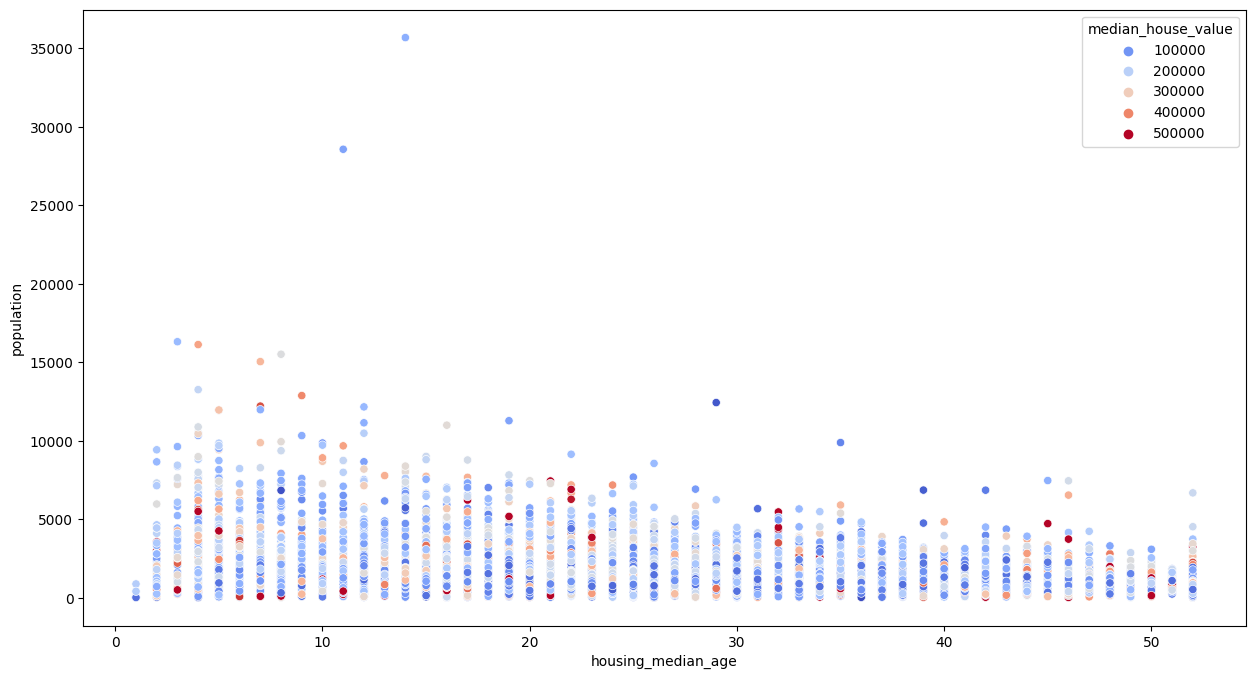

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(x= 'housing_median_age', y = 'population' ,data= data, hue='median_house_value',palette='coolwarm')

<ipython-input-20-a6b1ae75ba31>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,color='r',x=data.median_house_value)


<Axes: ylabel='Density'>

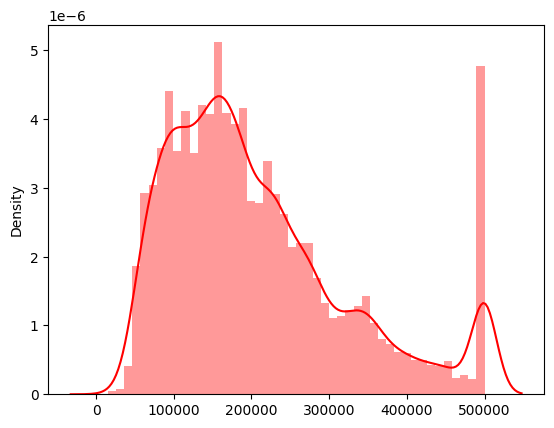

In [20]:
sns.distplot(data,color='r',x=data.median_house_value)

<Axes: >

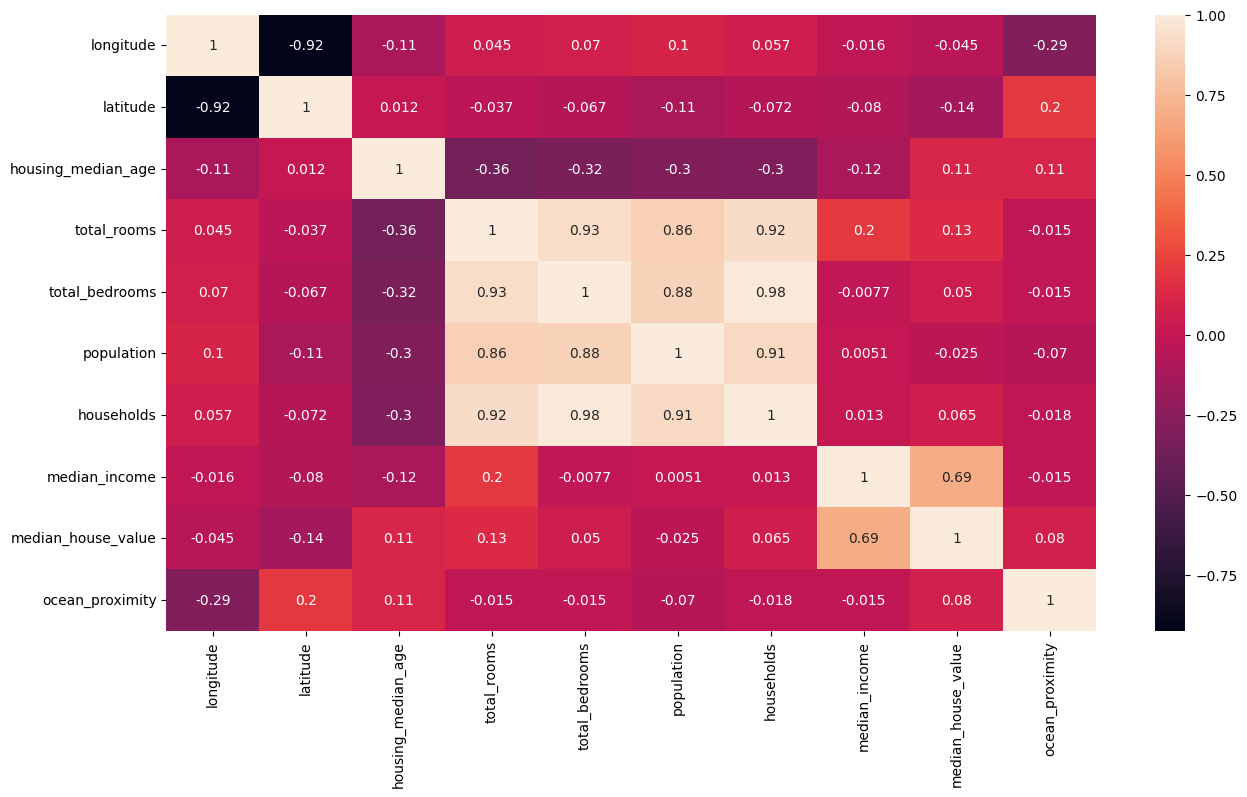

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,)

In [22]:
data['bedroom ratio'] = data.total_bedrooms / data.total_rooms
data['household_rooms'] = data.total_rooms / data.households

<Axes: >

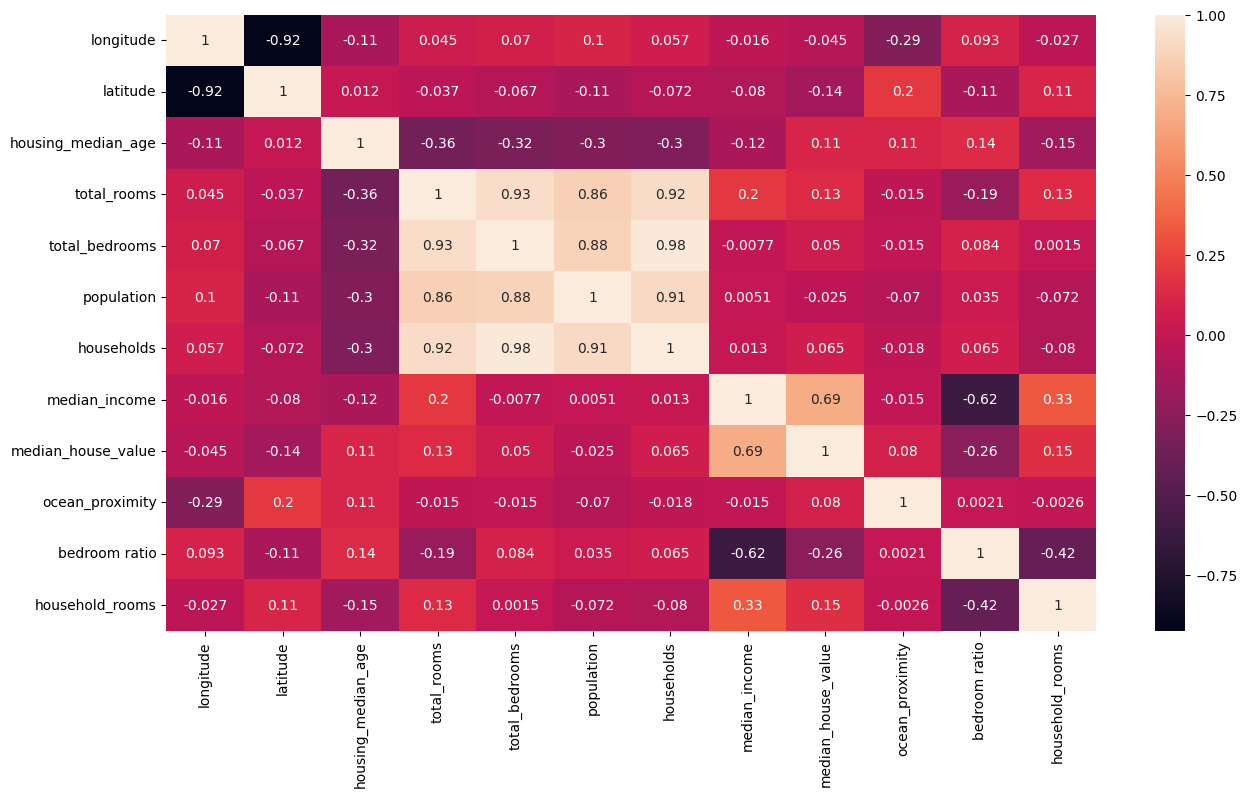

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,)

In [24]:
scaler = sp.StandardScaler()

In [25]:
scaler.fit(data)
standrized_data = scaler.transform(data)
standrized_data

array([[-1.32731375,  1.05171726,  0.98216331, ...,  1.29135065,
        -1.1460242 ,  0.62539465],
       [-1.32232256,  1.04235526, -0.60621017, ...,  1.29135065,
        -0.98725423,  0.3249418 ],
       [-1.33230494,  1.03767426,  1.85576873, ...,  1.29135065,
        -1.44051403,  1.15059359],
       ...,
       [-0.82320322,  1.77727236, -0.92388486, ..., -0.11700076,
         0.03680837, -0.09094308],
       [-0.87311515,  1.77727236, -0.84446619, ..., -0.11700076,
         0.11820445, -0.04101319],
       [-0.83318561,  1.74918635, -1.00330353, ..., -0.11700076,
         0.14049521, -0.07113779]])

In [26]:
data= pd.DataFrame(standrized_data,columns= data.columns)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom ratio,household_rooms
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,1.291351,-1.146024,0.625395
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,1.291351,-0.987254,0.324942
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,1.291351,-1.440514,1.150594
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,1.291351,-0.492925,0.155467
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,1.291351,-0.706141,0.342549
...,...,...,...,...,...,...,...,...,...,...,...,...
20428,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-1.115492,-0.117001,0.199820,-0.155420
20429,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,-1.124155,-0.117001,0.037412,0.274959
20430,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.992477,-0.117001,0.036808,-0.090943
20431,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-1.058316,-0.117001,0.118204,-0.041013


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>,
        <Axes: title={'center': 'bedroom ratio'}>,
        <Axes: title={'center': 'household_rooms'}>]], dtype=object)

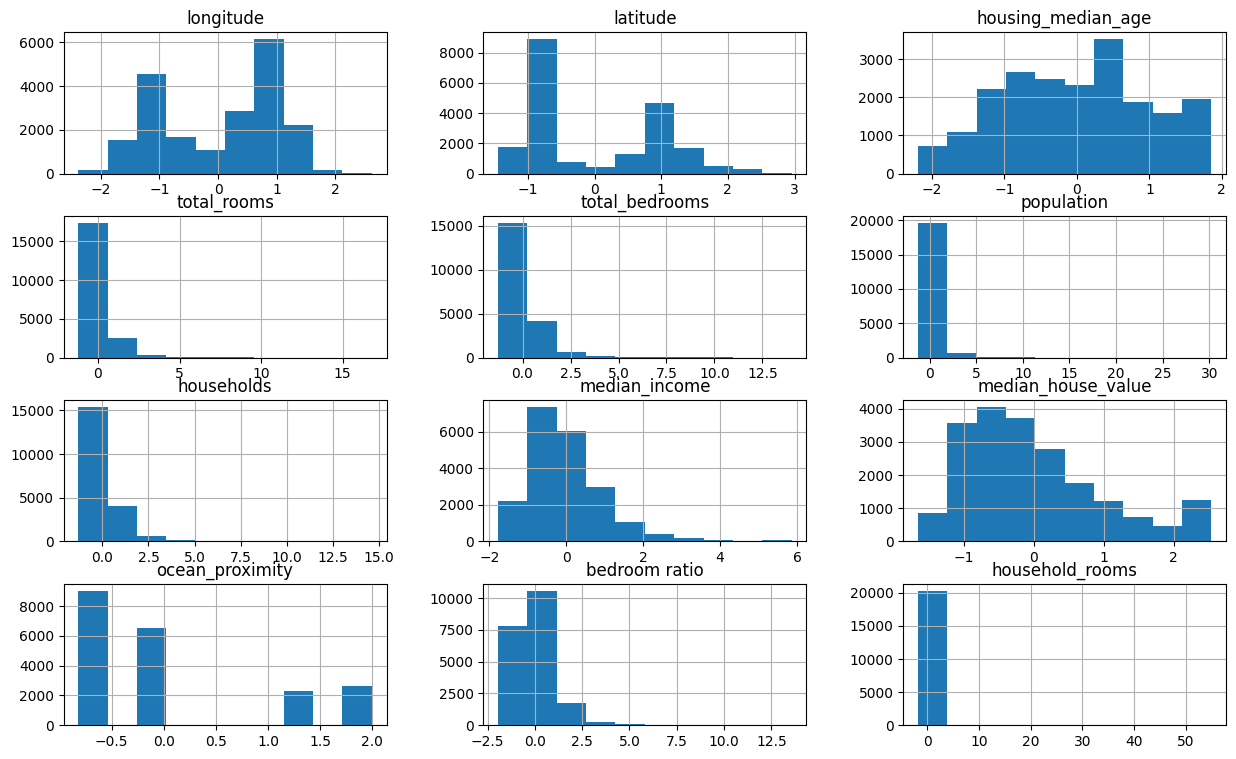

In [27]:
data.hist(figsize=(15,9))

In [28]:

import sklearn.model_selection as sm

In [29]:
x= data.drop('median_house_value',axis=1)
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bedroom ratio,household_rooms
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,1.291351,-1.146024,0.625395
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.291351,-0.987254,0.324942
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.291351,-1.440514,1.150594
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.291351,-0.492925,0.155467
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.291351,-0.706141,0.342549
...,...,...,...,...,...,...,...,...,...,...,...
20428,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-0.117001,0.199820,-0.155420
20429,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,-0.117001,0.037412,0.274959
20430,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.117001,0.036808,-0.090943
20431,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-0.117001,0.118204,-0.041013


In [30]:
y=data.median_house_value
y

0        2.128819
1        1.313626
2        1.258183
3        1.164622
4        1.172418
           ...   
20428   -1.115492
20429   -1.124155
20430   -0.992477
20431   -1.058316
20432   -1.017600
Name: median_house_value, Length: 20433, dtype: float64

In [31]:
x.std()

longitude             1.000024
latitude              1.000024
housing_median_age    1.000024
total_rooms           1.000024
total_bedrooms        1.000024
population            1.000024
households            1.000024
median_income         1.000024
ocean_proximity       1.000024
bedroom ratio         1.000024
household_rooms       1.000024
dtype: float64

In [32]:
y.std()

1.0000244711179667

In [33]:
xtrain,xtest,ytrain,ytest = sm.train_test_split(x,y,test_size=0.2,random_state=5)

In [34]:
xtrain.shape

(16346, 11)

In [35]:
ytrain.shape

(16346,)

In [36]:
xtest.shape

(4087, 11)

In [37]:
ytest.shape

(4087,)

In [38]:
import sklearn.linear_model as sl

In [39]:
regression = sl.LinearRegression()
regression.fit(xtrain,ytrain)

LinearRegression()

In [40]:

regression.score(xtest,ytest)

0.6384698929781847

In [41]:
ypredicted= regression.predict(xtest)
ypredicted

array([-0.74957305,  0.66389535,  0.40653924, ..., -0.45053395,
       -0.23713966,  0.07233878])

<Axes: ylabel='median_house_value'>

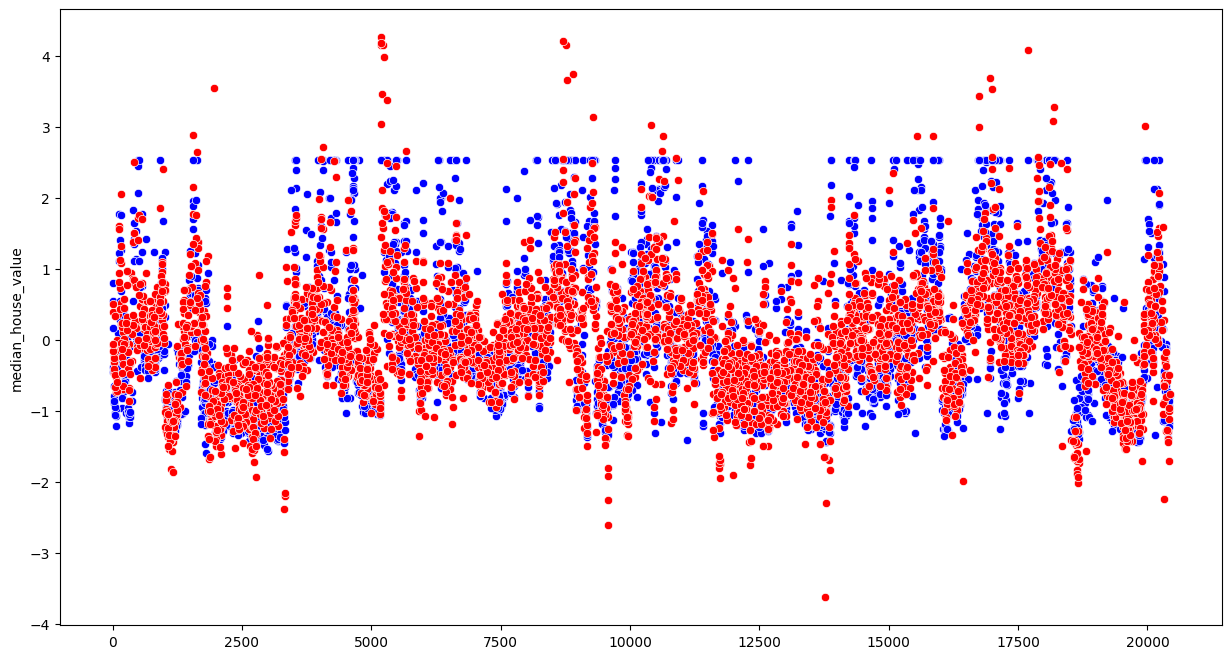

In [42]:
plt.figure(figsize=(15,8))


sns.scatterplot(x=xtest.index,y= ytest,c='b')
sns.scatterplot(x=xtest.index,y=ypredicted,c='r')




In [43]:
import sklearn.metrics as sme

In [44]:
MSE_LinearReg = sme.mean_squared_error(y_true=ytest,y_pred=ypredicted)
MSE_LinearReg

0.36764278643245635

In [45]:
from math import sqrt
RMSE_LinearReg= sqrt(MSE_LinearReg)
RMSE_LinearReg


0.6063355394766633

In [46]:
import sklearn.ensemble as se

In [60]:
for k in range (50,700,50):
  print(f'number of estimators:', k)
  forest = se.RandomForestRegressor(n_estimators=k,random_state=55)
  forest.fit(xtrain,ytrain)
  print('train Score of it :' ,forest.score(xtrain,ytrain))
  print('train Score of it :' ,forest.score(xtest,ytest))
  print('--------------------------------------------------')

number of estimators: 50
train Score of it : 0.9737916100919652
train Score of it : 0.808561256307635
--------------------------------------------------
number of estimators: 100
train Score of it : 0.9747869280427904
train Score of it : 0.8118809229050289
--------------------------------------------------
number of estimators: 150
train Score of it : 0.9751562809616358
train Score of it : 0.8131574087878939
--------------------------------------------------
number of estimators: 200
train Score of it : 0.9753037680799125
train Score of it : 0.8127913685789165
--------------------------------------------------
number of estimators: 250
train Score of it : 0.9753598415674652
train Score of it : 0.8131522185798434
--------------------------------------------------
number of estimators: 300
train Score of it : 0.9754622760953915
train Score of it : 0.8130430485571173
--------------------------------------------------
number of estimators: 350
train Score of it : 0.9755459845500837
train S

In [61]:
  forest = se.RandomForestRegressor(n_estimators=550,random_state=55)
  forest.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=550, random_state=55)

In [62]:
forest.score(xtest,ytest)

0.813638122499353

In [63]:
forest_ypred= forest.predict(xtest)
forest_ypred

array([-0.75539597,  0.04091136,  0.9723367 , ..., -0.45468118,
       -0.55392188,  0.52512839])

<Axes: ylabel='median_house_value'>

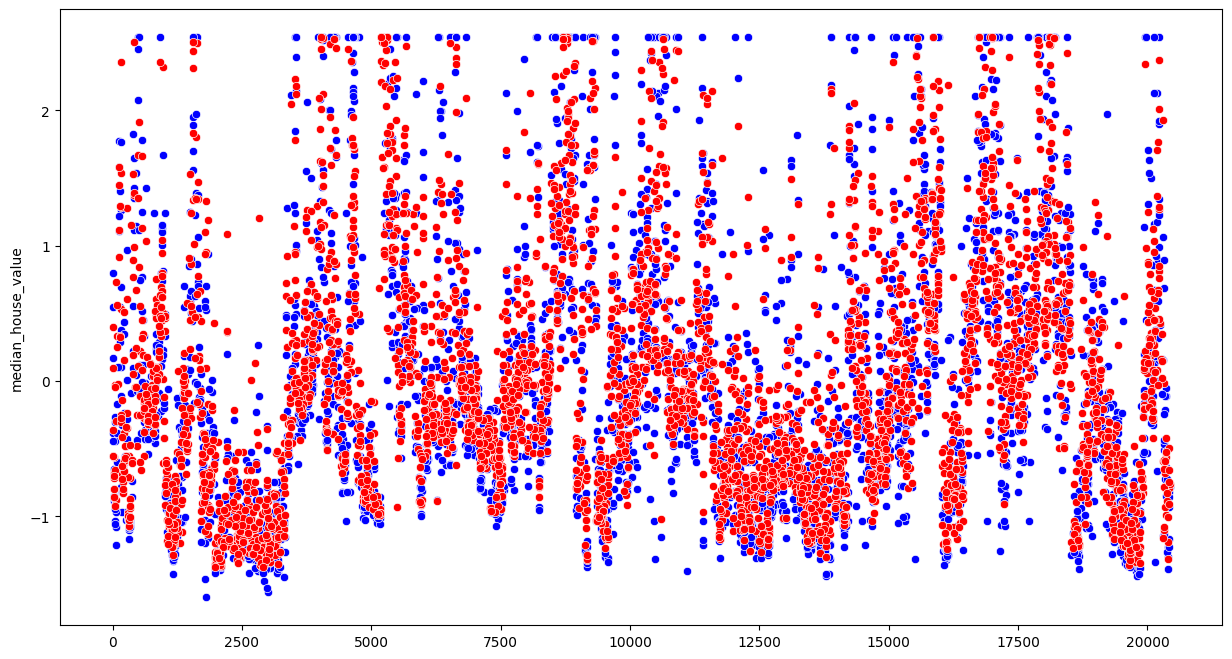

In [64]:
plt.figure(figsize=(15,8))


sns.scatterplot(x=xtest.index,y= ytest,c='b')
sns.scatterplot(x=xtest.index,y=forest_ypred,c='r')


In [65]:
MSE_forest = sme.mean_squared_error(y_true=ytest,y_pred=forest_ypred)
MSE_forest

0.18951284719694916

In [66]:
RMSE_forest= sqrt(MSE_forest)
RMSE_forest

0.43533073311787807